In [98]:
import numpy as np
import wave
import librosa
import librosa.display
from librosa.core import stft
import matplotlib.pyplot as plt
import scipy 
import matplotlib.cm as cm

In [4]:
def _wav2array(nchannels, sampwidth, data):
    """data must be the string containing the bytes from the wav file."""
    num_samples, remainder = divmod(len(data), sampwidth * nchannels)
    if remainder > 0:
        raise ValueError('The length of data is not a multiple of '
                         'sampwidth * num_channels.')
    if sampwidth > 4:
        raise ValueError("sampwidth must not be greater than 4.")

    if sampwidth == 3:
        a = np.empty((num_samples, nchannels, 4), dtype=np.uint8)
        raw_bytes = np.fromstring(data, dtype=np.uint8)
        a[:, :, :sampwidth] = raw_bytes.reshape(-1, nchannels, sampwidth)
        a[:, :, sampwidth:] = (a[:, :, sampwidth - 1:sampwidth] >> 7) * 255
        result = a.view('<i4').reshape(a.shape[:-1])
    else:
        # 8 bit samples are stored as unsigned ints; others as signed ints.
        dt_char = 'u' if sampwidth == 1 else 'i'
        a = np.fromstring(data, dtype='<%s%d' % (dt_char, sampwidth))
        result = a.reshape(-1, nchannels)
    return result


def readwav(file):
    """
    Read a wav file.
    Returns the frame rate, sample width (in bytes) and a numpy array
    containing the data.
    This function does not read compressed wav files.
    """
    wav = wave.open(file)
    rate = wav.getframerate()
    nchannels = wav.getnchannels()
    sampwidth = wav.getsampwidth()
    nframes = wav.getnframes()
    data = wav.readframes(nframes)
    wav.close()
    array = _wav2array(nchannels, sampwidth, data)
    return rate, sampwidth, array

In [116]:
audio = readwav('C:/Users/arshi/Downloads/1980s-Casio-Piano-C5.wav')[2]
print(audio.T[0])
audio = audio.astype(np.floating)
print(audio.shape)

[ 13   0   4 ... -36 -27 -49]
(92744, 1)


C:\Users\arshi\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


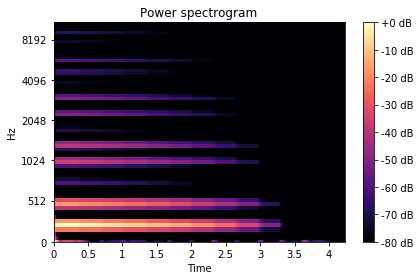

In [117]:
Spectogram = np.abs(librosa.feature.melspectrogram(audio.T[0], n_mels=64, fmax=2048))
librosa.display.specshow(librosa.amplitude_to_db(Spectogram,
                        ref=np.max),
                          y_axis='mel', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [118]:
"""Finding frequency envelope for """

ref_freqs_bins = librosa.mel_frequencies(n_mels = 64, fmax = 2048)
print(ref_freqs_bins)

[   0.           26.90670783   53.81341566   80.72012349  107.62683132
  134.53353915  161.44024698  188.34695481  215.25366264  242.16037047
  269.06707829  295.97378612  322.88049395  349.78720178  376.69390961
  403.60061744  430.50732527  457.4140331   484.32074093  511.22744876
  538.13415659  565.04086442  591.94757225  618.85428008  645.76098791
  672.66769574  699.57440357  726.4811114   753.38781922  780.29452705
  807.20123488  834.10794271  861.01465054  887.92135837  914.8280662
  941.73477403  968.64148186  995.54818969 1023.42742171 1052.22342354
 1081.82965354 1112.26890896 1143.56462848 1175.7409103  1208.82253064
 1242.83496285 1277.80439704 1313.7577602  1350.72273697 1388.72779096
 1427.80218663 1467.97601187 1509.28020114 1551.7465593  1595.40778609
 1640.29750134 1686.4502708  1733.90163282 1782.68812568 1832.84731572
 1884.41782629 1937.43936746 1991.95276665 2048.        ]


In [119]:
print(Spectogram.shape)

(64, 182)


In [120]:
peaks_index = []
for i in range (0,182):
    peaks_one_slice,_ = scipy.signal.find_peaks(Spectogram [:,i])
    peaks_index.append(peaks_one_slice)
print(peaks_index)

[array([ 4,  9, 14, 19, 24, 29, 34, 39, 44, 48, 51, 54, 57, 60],
      dtype=int64), array([ 4,  9, 14, 19, 24, 29, 34, 39, 44, 48, 51, 54, 57, 60],
      dtype=int64), array([ 4,  9, 14, 19, 24, 29, 34, 39, 44, 48, 51, 54, 57, 60],
      dtype=int64), array([ 4,  9, 14, 19, 24, 29, 34, 39, 44, 48, 51, 54, 57, 60],
      dtype=int64), array([ 4,  9, 14, 19, 24, 29, 34, 39, 44, 48, 51, 54, 57, 60],
      dtype=int64), array([ 4,  9, 14, 19, 24, 29, 34, 39, 44, 48, 51, 54, 57, 60],
      dtype=int64), array([ 4,  9, 14, 19, 24, 29, 34, 39, 44, 48, 51, 54, 57, 60],
      dtype=int64), array([ 4,  9, 14, 19, 24, 29, 34, 39, 44, 48, 51, 54, 57, 60],
      dtype=int64), array([ 4,  9, 14, 19, 24, 29, 34, 39, 44, 48, 51, 54, 57, 60],
      dtype=int64), array([ 4,  9, 14, 19, 24, 29, 34, 39, 44, 48, 51, 54, 57, 60],
      dtype=int64), array([ 4,  9, 14, 19, 24, 29, 34, 39, 44, 48, 51, 54, 57, 60],
      dtype=int64), array([ 4,  9, 14, 19, 24, 29, 34, 39, 44, 48, 51, 54, 57, 60],
      dtype

In [121]:
freqs_env = []
for i in range (0, 182):
    freq = ref_freqs_bins[peaks_index[i]]
    freqs_env.append(freq)
print(freqs_env)
np.savetxt('freqs_env.csv', freqs_env, delimiter = ',')


[array([ 107.62683132,  242.16037047,  376.69390961,  511.22744876,
        645.76098791,  780.29452705,  914.8280662 , 1052.22342354,
       1208.82253064, 1350.72273697, 1467.97601187, 1595.40778609,
       1733.90163282, 1884.41782629]), array([ 107.62683132,  242.16037047,  376.69390961,  511.22744876,
        645.76098791,  780.29452705,  914.8280662 , 1052.22342354,
       1208.82253064, 1350.72273697, 1467.97601187, 1595.40778609,
       1733.90163282, 1884.41782629]), array([ 107.62683132,  242.16037047,  376.69390961,  511.22744876,
        645.76098791,  780.29452705,  914.8280662 , 1052.22342354,
       1208.82253064, 1350.72273697, 1467.97601187, 1595.40778609,
       1733.90163282, 1884.41782629]), array([ 107.62683132,  242.16037047,  376.69390961,  511.22744876,
        645.76098791,  780.29452705,  914.8280662 , 1052.22342354,
       1208.82253064, 1350.72273697, 1467.97601187, 1595.40778609,
       1733.90163282, 1884.41782629]), array([ 107.62683132,  242.16037047,  3

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')

In [122]:
amp_env = []
for i in range (0, 182):
    amp_one_slice = Spectogram[peaks_index[i]]
    amp_env.append(amp_one_slice)
print(amp_env)
amp_env = np.array(amp_env)
print(type(amp_env))


[array([[5.74227415e+11, 1.74900530e+12, 2.69455406e+12, ...,
        5.50186509e+03, 2.74784824e+04, 1.35227150e+05],
       [8.95207578e+10, 2.47203084e+11, 3.69503629e+11, ...,
        4.05332934e+02, 1.86116024e+04, 1.11746094e+05],
       [5.37134918e+08, 1.60502150e+09, 2.50420358e+09, ...,
        1.33357183e+03, 4.46810600e+04, 2.74065531e+05],
       ...,
       [9.17145563e+07, 2.18671551e+08, 3.14281211e+08, ...,
        1.10649266e+03, 1.10021297e+04, 7.27753244e+04],
       [1.64394698e+08, 3.94643478e+08, 5.54625718e+08, ...,
        1.04435844e+03, 5.31232192e+03, 2.95593043e+04],
       [3.44107220e+08, 8.46002137e+08, 1.22794974e+09, ...,
        1.06550723e+03, 5.16072137e+03, 2.41499564e+04]]), array([[5.74227415e+11, 1.74900530e+12, 2.69455406e+12, ...,
        5.50186509e+03, 2.74784824e+04, 1.35227150e+05],
       [8.95207578e+10, 2.47203084e+11, 3.69503629e+11, ...,
        4.05332934e+02, 1.86116024e+04, 1.11746094e+05],
       [5.37134918e+08, 1.60502150e+09, 2

In [123]:
localmax = []
for i in range (0,64):
    max = np.amax(amp_env[i])
    localmax.append(max)
    
print(np.amax(localmax))
normalized_amp_env = amp_env / np.amax(localmax)
print(normalized_amp_env)
np.savetxt('norm_amp_env.csv', normalized_amp_env, delimiter = ',')


2873884432207.9414
[array([[1.99808805e-01, 6.08585814e-01, 9.37600006e-01, ...,
        1.91443505e-09, 9.56144308e-09, 4.70537883e-08],
       [3.11497417e-02, 8.60170579e-02, 1.28572891e-01, ...,
        1.41040095e-10, 6.47611371e-09, 3.88832944e-08],
       [1.86902059e-04, 5.58485053e-04, 8.71365443e-04, ...,
        4.64031126e-10, 1.55472710e-08, 9.53641448e-08],
       ...,
       [3.19130983e-05, 7.60891942e-05, 1.09357637e-04, ...,
        3.85016408e-10, 3.82831318e-09, 2.53229822e-08],
       [5.72029607e-05, 1.37320580e-04, 1.92988177e-04, ...,
        3.63396117e-10, 1.84848140e-09, 1.02854882e-08],
       [1.19735928e-04, 2.94375838e-04, 4.27278748e-04, ...,
        3.70755072e-10, 1.79573031e-09, 8.40324551e-09]])
 array([[1.99808805e-01, 6.08585814e-01, 9.37600006e-01, ...,
        1.91443505e-09, 9.56144308e-09, 4.70537883e-08],
       [3.11497417e-02, 8.60170579e-02, 1.28572891e-01, ...,
        1.41040095e-10, 6.47611371e-09, 3.88832944e-08],
       [1.86902059e-04

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')